In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [13]:
df = pd.read_json(r"df.json")

In [14]:
AAA = pd.read_csv('..\..\..\data\AAA\main_aaa.csv')
AA = pd.read_csv('..\..\..\data\AA\main_aa.csv')
Indie = pd.read_csv('..\..\..\data\Indie\main_indie.csv')

In [15]:
AAA = AAA[['steamId', 'name']]
AA = AA[['steamId', 'name']]
Indie = Indie[['steamId', 'name']]

In [16]:
steamId_name = pd.concat([AAA,AA,Indie], axis=0).reset_index(drop=True)

In [17]:
df_with_name = pd.merge(df, steamId_name, on='steamId', how='inner')

In [19]:
df_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17550 entries, 0 to 17549
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   steamId      17550 non-null  int64  
 1   avgPlaytime  17550 non-null  float64
 2   tags         17550 non-null  object 
 3   genres       17550 non-null  object 
 4   countryData  17550 non-null  object 
 5   history      17550 non-null  object 
 6   copiesSold   17550 non-null  int64  
 7   revenue      17550 non-null  float64
 8   players      17550 non-null  int64  
 9   publisher    17550 non-null  object 
 10  name         17550 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [20]:
df_with_name.head(2)

,steamId,avgPlaytime,tags,genres,countryData,history,copiesSold,revenue,players,publisher,name
0,2358720,0.000000,"[Mythology, Action RPG, Action, Souls-like, RP...","[Action, Adventure, RPG]","{'cn': 80.4, 'us': 3, 'ru': 1.4, 'gb': 0.8, 'b...","[{'timeStamp': '2024-08-21 16:49:35', 'reviews...",18986400,1.025095e+09,22771854,AAA,Black Myth: Wukong
1,1086940,156.189715,"[RPG, Character Customization, Choices Matter,...","[Adventure, RPG, Strategy]","{'us': 29.4, 'cn': 15.5, 'ru': 5.7, 'gb': 5.3,...","[{'timeStamp': '2020-10-06 20:00:00', 'reviews...",13542975,6.875511e+08,13542975,AAA,Baldur's Gate 3


In [21]:
x = df_with_name.iloc[0]
x

steamId                                                  2358720
avgPlaytime                                                  0.0
tags           [Mythology, Action RPG, Action, Souls-like, RP...
genres                                  [Action, Adventure, RPG]
countryData    {'cn': 80.4, 'us': 3, 'ru': 1.4, 'gb': 0.8, 'b...
history        [{'timeStamp': '2024-08-21 16:49:35', 'reviews...
copiesSold                                              18986400
revenue                                             1025094722.0
players                                                 22771854
publisher                                                    AAA
name                                          Black Myth: Wukong
Name: 0, dtype: object

In [22]:
tags = x["tags"]
tags

['Mythology',
 'Action RPG',
 'Action',
 'Souls-like',
 'RPG',
 'Combat',
 'Story Rich',
 'Singleplayer',
 'Drama',
 'Action-Adventure',
 'Dark Fantasy',
 'Atmospheric',
 'Adventure',
 '3D',
 'Fantasy',
 'Hack and Slash',
 'Third Person',
 'Difficult',
 'Music',
 'Violent']

In [23]:
" ".join([tag for tag in tags])

'Mythology Action RPG Action Souls-like RPG Combat Story Rich Singleplayer Drama Action-Adventure Dark Fantasy Atmospheric Adventure 3D Fantasy Hack and Slash Third Person Difficult Music Violent'

In [24]:
def genres_and_tags_to_string(row):
    tags = row["genres"]
    tags = " ".join([j for j in tags])

    features = row["tags"]
    features = " ".join([j for j in features])
    return tags + " " + features

In [25]:
df_with_name["string"] = df_with_name.apply(genres_and_tags_to_string, axis=1)
df_with_name["string"]

0        Action Adventure RPG Mythology Action RPG Acti...
1        Adventure RPG Strategy RPG Character Customiza...
2        RPG Cyberpunk Open World Nudity RPG Singleplay...
3        Action RPG Souls-like Open World Dark Fantasy ...
4        Action Adventure Open World Action Multiplayer...
                               ...                        
17545    Action Adventure Adventure Action Side Scrolle...
17546    Adventure Casual Indie RPG Strategy Early Acce...
17547              Action Casual Indie Action Indie Casual
17548    Adventure Casual Indie Racing Indie Casual Adv...
17549    Action Adventure Casual Indie Action Casual Ad...
Name: string, Length: 17550, dtype: object

In [26]:
tfidf = TfidfVectorizer(max_features=2000)

In [28]:
tfidf_matrix = tfidf.fit_transform(list(df_with_name["string"]))

In [30]:
tfidf_matrix

<17550x485 sparse matrix of type '<class 'numpy.float64'>'
	with 331342 stored elements in Compressed Sparse Row format>

In [31]:
print(tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())

['1980s' '1990' '2d' '360' '3d' '40k' '4x' '5d' '6dof' 'abstract' 'access'
 'accounting' 'action' 'addictive' 'adventure' 'agriculture' 'aliens'
 'alternate' 'ambient' 'america' 'american' 'and' 'animation' 'anime'
 'apocalyptic' 'arcade' 'archery' 'arena' 'artificial' 'arts' 'assassin'
 'asymmetric' 'asynchronous' 'atmospheric' 'attack' 'atv' 'audio' 'auto'
 'automation' 'automobile' 'awkward' 'base' 'baseball' 'based'
 'basketball' 'battle' 'battler' 'beat' 'beautiful' 'benchmark' 'bikes'
 'birds' 'blood' 'bmx' 'board' 'book' 'boomer' 'boss' 'bowling' 'boxing'
 'builder' 'building' 'bullet' 'campaign' 'capitalism' 'card' 'cartoon'
 'cartoony' 'casual' 'cats' 'character' 'chess' 'choices' 'choose'
 'cinematic' 'city' 'class' 'classic' 'click' 'clicker' 'co' 'coding'
 'cold' 'collectathon' 'collector' 'colony' 'colorful' 'combat' 'comedy'
 'comic' 'competitive' 'conspiracy' 'content' 'control' 'controller'
 'controls' 'conversation' 'cooking' 'cozy' 'craft' 'crafting' 'crawler'
 'creat

In [55]:
game2idx = pd.Series(df_with_name.index, index=df_with_name["name"])
game2idx

name
Black Myth: Wukong         0
Baldur's Gate 3            1
Cyberpunk 2077             2
ELDEN RING                 3
Grand Theft Auto V         4
                       ...  
Exodus: Creepy Time    17545
Stratum Descent        17546
NanoScape              17547
Viking's drakkars      17548
Tompi Jones            17549
Length: 17550, dtype: int64

In [33]:
idx = game2idx["ELDEN RING"]
idx

3

In [34]:
query_game = tfidf_matrix[idx]
query_game

<1x485 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [35]:
scores = cosine_similarity(query_game, tfidf_matrix)
scores

array([[0.55909842, 0.40278186, 0.43445098, ..., 0.14671644, 0.        ,
        0.11714093]])

In [36]:
# 顯示結果
print(tfidf.get_feature_names_out())
print(query_game.toarray())

['1980s' '1990' '2d' '360' '3d' '40k' '4x' '5d' '6dof' 'abstract' 'access'
 'accounting' 'action' 'addictive' 'adventure' 'agriculture' 'aliens'
 'alternate' 'ambient' 'america' 'american' 'and' 'animation' 'anime'
 'apocalyptic' 'arcade' 'archery' 'arena' 'artificial' 'arts' 'assassin'
 'asymmetric' 'asynchronous' 'atmospheric' 'attack' 'atv' 'audio' 'auto'
 'automation' 'automobile' 'awkward' 'base' 'baseball' 'based'
 'basketball' 'battle' 'battler' 'beat' 'beautiful' 'benchmark' 'bikes'
 'birds' 'blood' 'bmx' 'board' 'book' 'boomer' 'boss' 'bowling' 'boxing'
 'builder' 'building' 'bullet' 'campaign' 'capitalism' 'card' 'cartoon'
 'cartoony' 'casual' 'cats' 'character' 'chess' 'choices' 'choose'
 'cinematic' 'city' 'class' 'classic' 'click' 'clicker' 'co' 'coding'
 'cold' 'collectathon' 'collector' 'colony' 'colorful' 'combat' 'comedy'
 'comic' 'competitive' 'conspiracy' 'content' 'control' 'controller'
 'controls' 'conversation' 'cooking' 'cozy' 'craft' 'crafting' 'crawler'
 'creat

In [37]:
scores = scores.flatten()

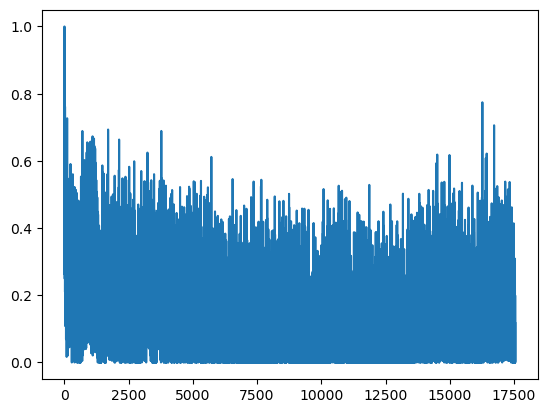

In [38]:
plt.plot(scores)

In [39]:
(-scores).argsort()

array([    3, 16267,    25, ..., 11253,  5066, 13354], dtype=int64)

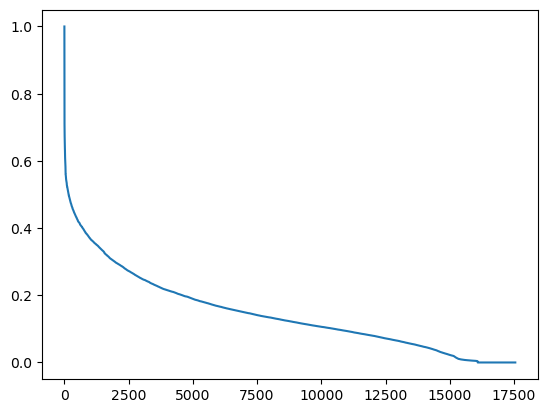

In [40]:
plt.plot(scores[(-scores).argsort()])

In [41]:
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

array([16267,    25,   107,    60,    80], dtype=int64)

In [43]:
df_with_name["name"].iloc[recommended_idx]

16267                 The Last Hero of Nostalgaia
25                                DARK SOULS™ III
107      DARK SOULS™ II: Scholar of the First Sin
60                        DARK SOULS™: REMASTERED
80                                      CODE VEIN
Name: name, dtype: object

In [44]:
idx = game2idx["Diablo® IV"]

print(idx)

873


In [46]:
from fuzzywuzzy import process

In [48]:
closest_match = process.extractOne("diablo IV", df_with_name["name"])
closest_match

('Diablo® IV', 100, 873)

In [50]:
df_with_name[df_with_name["steamId"] == 240]["name"].to_string(index=False)

'Counter-Strike: Source'

In [51]:
def recommend(name_or_index):

    if isinstance(name_or_index, int):
        matched_game_name = df_with_name[df_with_name["id"] == name_or_index]["name"].to_string(index=False)

    else:
        # 模糊搜索 (字母大小寫皆適用)
        closest_match = process.extractOne(name_or_index, df_with_name["name"])

        # 根據輸入的遊戲名稱，對照遊戲表找出對應的索引值
        if closest_match[1] > 20:
            matched_game_name = closest_match[0]

        else:
            return "找不到輸入的遊戲名稱或ID"

    idx = game2idx[matched_game_name]

    # 確認 idx 是否有值
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    # 找出指定遊戲的matrix
    query_game = tfidf_with_name_matrix[idx]

    # 將該遊戲的matrix與其他遊戲的matrix做相似度比對
    scores = cosine_similarity(query_game, tfidf_with_name_matrix)

    # 將scores拉平
    scores = scores.flatten()

    # 得到前五名相似度最高的遊戲
    recommended_idx = (-scores).argsort()[1:6]

    # 取得推薦遊戲名稱列表和對應的索引
    recommended_games = df_with_name["name"].iloc[recommended_idx]
    recommended_indexes = recommended_idx

    # 將相似度的遊戲index丟到df_with_name裡面返回遊戲名稱
    return matched_game_name, list(zip(recommended_indexes, recommended_games))

In [52]:
def user():
    if __name__ == "__main__":

        user_input = input("請輸入遊戲名稱或steam id: ")

        try:
            user_input = int(user_input)

        except ValueError:
            user_input = user_input

        name, data = recommend(user_input)

        if data:
            match_df = pd.DataFrame(data, columns=["game_index", "game_name"])

            print(f"遊戲名稱:{name}")
            print(f"相似遊戲:\n{match_df}")

In [ ]:
user()

In [3]:
# Modify the function to return both steamId and name
def recommond_game(df_result, user_input):
    
    def genres_and_tags_to_string(row):
        tags = row["genres"]
        tags = " ".join([j for j in tags])

        features = row["tags"]
        features = " ".join([j for j in features])
        return tags + " " + features

    # Convert genres and tags to a string format
    df_result["string"] = df_result.apply(genres_and_tags_to_string, axis=1)

    # Apply TF-IDF
    tfidf = TfidfVectorizer(max_features=2000)
    tfidf_matrix = tfidf.fit_transform(df_result["string"])

    # Map steamId to index
    game2idx = pd.Series(df_result.index, index=df_result["steamId"])

    # Check if user_input exists in game2idx
    if user_input not in game2idx:
        return "Steam ID 不存在於資料中。"

    # Query the game vector
    idx = game2idx[user_input]
    query_game = tfidf_matrix[idx]

    # Calculate similarity scores
    scores = cosine_similarity(query_game, tfidf_matrix).ravel()

    # Find top 5 related games' indices
    recommended_idx = scores.argsort()[-6:-1][::-1]

    # Retrieve the steamId and name without the index
    recommond_result = df_result[["steamId", "name"]].iloc[recommended_idx].reset_index(drop=True)

    return recommond_result

# Test the function
print(recommond_game(df_result, 240))


   steamId                             name
0    33930      Arma 2: Operation Arrowhead
1   359550  Tom Clancy's Rainbow Six® Siege
2   222880                       Insurgency
3    65790           ARMA: Cold War Assault
4   801550                          VAIL VR
